# Итоговая работа по курсу "Анализ данных"

Магистерская программа "Управление развитием бизнеса" планирует открыть онлайн-курс на платформе [Udemy](https://www.udemy.com/) для увеличения узнаваемости бренда программы. Для принятия решения о том, каким именно должен быть курс, необходимо провести анализ уже существующих на платформе курсов. 

Вот ключевые вопросы, на которые необходимо дать ответы в результате анализа:<br>
- каким должен быть курс?
- сколько он должен длится и из скольких лекций состоять?
- должен ли он быть платным? если да, то какую цену необходимо выбрать?
- когда лучше разместить курс на платформе?
- какие курсы посмотреть в качестве примера?

Информация о курсах на платформе [Udemy](https://www.udemy.com/) представлена в таблице `udemy_courses.csv`

# Инструкция к выполнению работы

## 1. Откройте таблицу и изучите общую информацию о данных

Скачайте с портала on.econ.msu.ru таблицу `udemy_courses.csv`. Помните, что для корректной работы файл с данными и файл с проектом должны находиться в одной папке.<br>
Изучите общую информацию о таблице и сделайте выводы о следующих шагах анализа.

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Загрузка данных

In [131]:
df = pd.read_csv('udemy_courses.csv', sep=';')
df.head()

,courseID,course_title,URL,is_paid,PRICE,num_subscribers,NUMreviews,num_lectures,Level,content_duration,published_timestamp,Subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,ИСТИНА,200.0,2147,23,51,All Levels,1.5,18.01.2017Z23:58:58,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,ИСТИНА,75.0,2792,923,274,All Levels,39.0,09.03.2017Z19:34:20,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,ИСТИНА,45.0,2174,74,51,Intermediate Level,2.5,19.12.2016Z22:26:30,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,ИСТИНА,95.0,2451,11,36,All Levels,3.0,30.05.2017Z23:07:24,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,ИСТИНА,200.0,1276,45,26,Intermediate Level,2.0,13.12.2016Z17:57:18,Business Finance


In [132]:
df.shape

(3678, 12)

## 2. Подготовьте данные для анализа

1. Вспомните основные правила оформления заголовков столбцов. Все ли столбцы в `udemy_courses.csv` соотвествуют требованиям? Приведите их к верному виду.

In [133]:
df.columns

Index(['courseID', 'course_title',
       'URL                                                           ',
       'is_paid', 'PRICE', 'num_subscribers', 'NUMreviews', 'num_lectures',
       '                                       Level', 'content_duration',
       'published_timestamp', 'Subject'],
      dtype='object')

In [134]:
df.rename(columns={'courseID' : 'Course_ID',
          'course_title':'Course_Title',
          'URL                                                           ':'URL',
          'is_paid':'Is_Paid',
          'PRICE':'Price',
          'num_subscribers':'Num_Subscribers',
          'NUMreviews':'Num_Reviews',
          'num_lectures':'Num_Lectures',
          '                                       Level':'Level',
          'content_duration':'Content_Duration',
          'published_timestamp':'Published_Timestamp'}, inplace=True)
df.head()

,Course_ID,Course_Title,URL,Is_Paid,Price,Num_Subscribers,Num_Reviews,Num_Lectures,Level,Content_Duration,Published_Timestamp,Subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,ИСТИНА,200.0,2147,23,51,All Levels,1.5,18.01.2017Z23:58:58,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,ИСТИНА,75.0,2792,923,274,All Levels,39.0,09.03.2017Z19:34:20,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,ИСТИНА,45.0,2174,74,51,Intermediate Level,2.5,19.12.2016Z22:26:30,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,ИСТИНА,95.0,2451,11,36,All Levels,3.0,30.05.2017Z23:07:24,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,ИСТИНА,200.0,1276,45,26,Intermediate Level,2.0,13.12.2016Z17:57:18,Business Finance


2. В таблице есть пропущенные значения. Опишите, какие пропущенные значения вы обнаружили. Почему могли возникнуть эти пропуски? Можно ли их заполнить или лучше удалить данные с пропусками? Объясните, почему вы принимаете то или иное решение.

In [135]:
df.isnull().sum()

Course_ID                0
Course_Title             0
URL                      0
Is_Paid                134
Price                  282
Num_Subscribers          0
Num_Reviews              0
Num_Lectures             0
Level                    0
Content_Duration         0
Published_Timestamp      0
Subject                  0
dtype: int64

В таблице пропущено много значений, посмотрим на них

In [136]:
df[df.Is_Paid.isnull()].head()

,Course_ID,Course_Title,URL,Is_Paid,Price,Num_Subscribers,Num_Reviews,Num_Lectures,Level,Content_Duration,Published_Timestamp,Subject
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,NaN,150.0,9221,138,25,All Levels,3.0,02.05.2014Z19:13:30,Business Finance
46,1247394,Cryptocurrency Trading: Complete Guide To Trad...,https://www.udemy.com/cryptocurrency-trading/,NaN,95.0,367,42,35,All Levels,5.0,22.06.2017Z2:18:47,Business Finance
74,285638,Learn to Trade for Profit:Trading with Japanes...,https://www.udemy.com/introduction-to-japanese...,NaN,60.0,16385,273,45,Beginner Level,3.0,02.09.2014Z7:53:13,Business Finance
110,381330,Live Account - ETF Trading System - Hacking Th...,https://www.udemy.com/cracked-wall-street-hack...,NaN,150.0,2318,19,16,All Levels,5.0,31.12.2014Z6:29:21,Business Finance
138,252396,How to Pick The Right Penny Stocks To Invest I...,https://www.udemy.com/how-to-make-5000month-tr...,NaN,150.0,9015,65,23,All Levels,2.5,02.07.2014Z0:04:27,Business Finance


In [137]:
df[df.Price.isnull()].head()

,Course_ID,Course_Title,URL,Is_Paid,Price,Num_Subscribers,Num_Reviews,Num_Lectures,Level,Content_Duration,Published_Timestamp,Subject
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,ЛОЖЬ,NaN,1514,66,11,Beginner Level,0.55,24.03.2017Z1:19:57,Business Finance
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,ЛОЖЬ,NaN,50855,2698,15,Beginner Level,1.50,25.12.2013Z23:53:34,Business Finance
106,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,ЛОЖЬ,NaN,17160,620,23,All Levels,1.00,30.08.2014Z0:10:38,Business Finance
108,923616,Website Investing 101 - Buying & Selling Onlin...,https://www.udemy.com/cash-flow-website-invest...,ЛОЖЬ,NaN,6811,151,51,All Levels,2.00,05.08.2016Z20:03:15,Business Finance
112,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,ЛОЖЬ,NaN,19339,794,9,Beginner Level,2.00,01.04.2014Z1:35:06,Business Finance


Пропущенные значения встречаются либо в столбце `Is_Paid`, либо в столбце `Price`. Стоимость курса и информация о том, является ли курс платным, связаными между собой. Если курс платный, то всегда должна быть указана цена за него. Если курс бесплатный, то его цена должна быть 0.

Пропуски могли появиться из-за того, что при вводе данных не стали явно указывать платность курса, если ввели цену. И наоборот, не стали указывать цену если курс бесплтаный.

Заменим пропуски в `Price` на 0 т.к. они встречаются в бесплатных курса. А так же заменим пропуски в столбце `Is_Paid` на истину т.к. они встречаются в платных курсах.

In [138]:
df.Is_Paid.replace(to_replace=np.nan,value='ИСТИНА', inplace=True)
df.Price.replace(to_replace=np.nan,value=0, inplace=True)

3. Соотвествует ли содержание всех столбцов их типам? Проведите необходимые замены типов данных, поясняя свои действия.
> Обратите внимание, что в данные в столбце `is_paid`, скорее всего, содержат булевые значения. В python это означает, что они должны принимать значения `True` или `False`

In [139]:
df.dtypes

Course_ID                int64
Course_Title            object
URL                     object
Is_Paid                 object
Price                  float64
Num_Subscribers          int64
Num_Reviews              int64
Num_Lectures             int64
Level                   object
Content_Duration       float64
Published_Timestamp     object
Subject                 object
dtype: object

`Published_Timestamp` и `Is_Paid` являются строками, хотя правильный тип данных для них будет дата и булевое значение. Сделаем замену.

In [140]:
df.Is_Paid.replace({'ИСТИНА': True, 'ЛОЖЬ': False}, inplace=True)

In [141]:
# разделяем строку по Z
df.Published_Timestamp = df.Published_Timestamp.map(lambda x: x.split('Z')[0])
# делаем из строки "dd.mm.yyyy" дату
df.Published_Timestamp = df.Published_Timestamp.map(lambda x: pd.to_datetime(x, infer_datetime_format=True))

In [142]:
df.dtypes

Course_ID                       int64
Course_Title                   object
URL                            object
Is_Paid                          bool
Price                         float64
Num_Subscribers                 int64
Num_Reviews                     int64
Num_Lectures                    int64
Level                          object
Content_Duration              float64
Published_Timestamp    datetime64[ns]
Subject                        object
dtype: object

4. Сколько дубликатов содержит таблица? Удалите строки-дубликаты. Есть ли скрытые дубликаты в таблице? Например, что в столбце `Level` есть одни и те же значения, но записанные по-разному: где-то опечатались в количестве букв l, а где-то неверно указали уровень курса. Есть ли аналогичные артефакты в других ячейках?<br>
> В выводах отметьте не только, сколько именно дубликатов было удалено, но и возможные причины их появления

Посмотрим количество дупликатов самым простым способом

In [143]:
df[df.duplicated()]

,Course_ID,Course_Title,URL,Is_Paid,Price,Num_Subscribers,Num_Reviews,Num_Lectures,Level,Content_Duration,Published_Timestamp,Subject
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20.0,0,0,27,Beginner Level,1.500000,2017-04-23,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25.0,0,0,10,All Levels,1.000000,2016-12-15,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40.0,0,0,35,All Levels,5.500000,2017-02-07,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20.0,0,0,9,Beginner Level,0.616667,2014-04-16,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75.0,43285,525,24,All Levels,4.000000,2013-03-01,Web Development


Проверим текстовые поля на опечатки

In [115]:
df.Level.value_counts()

All Levels            1900
Beginner Level        1228
Intermediate Level     421
Expert Level            51
Beginer Level           42
Al Levels               29
expert                   7
Name: Level, dtype: int64

In [116]:
df.Subject.value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: Subject, dtype: int64

В уровнях курсов есть явные опечатки, заменим их.

In [144]:
df.Level.replace({'Beginer Level': 'Beginner Level', 'Al Levels': 'All Levels', 'expert' : 'Expert Level'}, inplace=True)
df.Level.value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: Level, dtype: int64

Самый надежный способ найти дупликаты это посмотреть сколько раз встречается одна и та же ссылка. Ведь ссылка уникальна для каждого курса.

In [145]:
(df.URL.value_counts() > 1).sum()

6

In [146]:
df.URL.value_counts()[:6]

https://www.udemy.com/cfa-level-2-quantitative-methods/                        2
https://www.udemy.com/build-beautiful-html5-website/                           2
https://www.udemy.com/microstation-celulas/                                    2
https://www.udemy.com/introduction-to-forex-trading-business-for-beginners/    2
https://www.udemy.com/essentials-of-money-value/                               2
https://www.udemy.com/understanding-financial-statements/                      2
Name: URL, dtype: int64

In [148]:
df.shape

(3678, 12)

In [149]:
df.drop_duplicates(subset='URL', inplace=True)

Мы удалили 6 дубликатов, на 1 больше чем изначально нашли

In [150]:
df.shape

(3672, 12)

## 3. Ответьте на следующие вопросы:

**1. Каким должен быть курс?**<br>
Какая область знаний (`Subject`) самая популярная на платформе? Какого уровня сложности лучше сделать курс?
> Задание на получение дополнительных 5 баллов: создайте круговую диаграмму, отражающую количество курсов в каждой области знаний

<br>**2. Сколько  должен длится курс и из скольких лекций состоять?**
<br>
Сколько в среднем длятся курсы из разных областей знаний? А из скольких лекций состоят? Есть ли различия в средней длительности платных и бесплатных курсов?
>Для выполнения пунктов 1 и 2 рекомендуем всопмнить о сводных таблицах

<br>**3. Должен ли курс быть платным? Если да, то какую цену необходимо выбрать?**<br>
Где пользователей больше: на бесплатых или платных курсах?<br>
Присвойте каждому курсу тип:
- `Бесплатный` для курсов без оплаты,
- `Недорогой` для курсов нижнего квантиля (по критерию стоимости),
- `Дорогой` для курсов верзнего квантиля (по критерию стоимости),
- `Средний` для всех остальных курсов.
Курсы какой ценовой категории популярнее у пользователей платформы?
<br><br>

<br>**4. Когда лучше разместить курс на платформе?**<br>
Есть ли зависимость между месяцев размещения курса на платформе и его популярностью среди пользователей?
>Для выполнения пункта 4 удобно создать отдельный столбец с месяцем размещения курса на платформе
<br><br>

<br>**5. Какие курсы посмотреть в качестве примера?**<br>
Проанализируйте топ-10 самых популярных курсов в каждой из областей знаний (`Subject`). Какие из них подходят под предмет программы "Управление развитием бизнеса"? Составьте список курсов, которые необходимо проанализировать совету программы в качестве примера.

### Каким должен быть курс?

In [157]:
df.Subject.value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: Subject, dtype: int64

Самыми популярными на платформе являются курсы по веб разработке и финансам

In [158]:
df.Level.value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: Level, dtype: int64

Самыми популярными на платформе являются курсы подходящие для всех и начального уровня

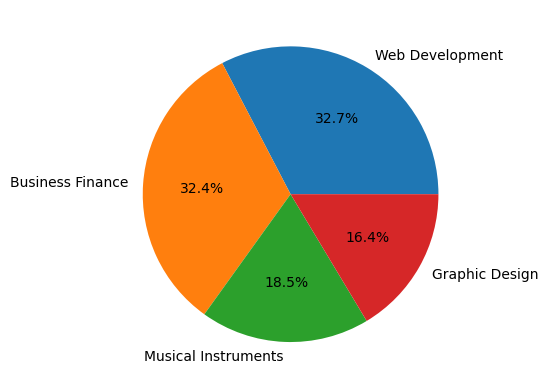

In [156]:
serie = df.Subject.value_counts()
labels = list(serie.index)
values = list(serie)

plt.pie(values,
        labels=labels,
        autopct='%1.1f%%')

plt.show()

### Сколько должен длится курс и из скольких лекций состоять?

In [161]:
df.groupby(by=df.Subject, as_index=False).agg({'Content_Duration':'mean', 'Num_Lectures' : 'mean'})

,Subject,Content_Duration,Num_Lectures
0,Business Finance,3.557697,32.462636
1,Graphic Design,3.585465,32.093023
2,Musical Instruments,2.854387,38.316176
3,Web Development,5.596122,52.841535


В среднем длительность контента должна быть около 3, а количество лекций около 35. Для веб разработки эти показатели 1,5 раза больше.

In [162]:
df.groupby(by=df.Is_Paid, as_index=False).agg({'Content_Duration':'mean'})

,Is_Paid,Content_Duration
0,False,2.200000
1,True,4.255457


Длительность платных курсов в среднем в 2 раза больше

### Должен ли курс быть платным? Если да, то какую цену необходимо выбрать?

Найдем квантили

In [164]:
df.Price.describe()

count    3672.000000
mean       66.102941
std        61.035920
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: Price, dtype: float64

Напишем функцию, которая будет присваивать тип курсу в зависимости от его стоимости

In [169]:
def apply_type(num):
    if num == 0:
        return 'Бесплатный'
    elif num <= 20:
        return 'Недорогой'
    elif num >= 95:
        return 'Дорогой'
    else:
        return 'Средний'

In [170]:
df['Course_Type'] = df.Price.map(apply_type)

In [171]:
df.head()

,Course_ID,Course_Title,URL,Is_Paid,Price,Num_Subscribers,Num_Reviews,Num_Lectures,Level,Content_Duration,Published_Timestamp,Subject,Course_Type
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18,Business Finance,Дорогой
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39.0,2017-09-03,Business Finance,Средний
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance,Средний
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30,Business Finance,Дорогой
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13,Business Finance,Дорогой


In [177]:
df.groupby(by=df.Course_Type, as_index=False).agg({'Num_Subscribers':'sum'}).sort_values(by='Num_Subscribers', ascending=False)

,Course_Type,Num_Subscribers
1,Дорогой,4378903
0,Бесплатный,3575525
3,Средний,2440749
2,Недорогой,1320658


Дорогие курсы имеют больше всего пользователей. Вторые по популярности бесплатные курсы

### Когда лучше разместить курс на платформе?

Создадим столбец в месяцем

In [180]:
df['Month'] = df.Published_Timestamp.dt.month

In [183]:
df.groupby(by=df.Month, as_index=False).agg({'Num_Subscribers':'sum'}).sort_values(by='Num_Subscribers', ascending=False)

,Month,Num_Subscribers
8,9,1361346
2,3,1108232
9,10,1096278
1,2,1033712
6,7,968950
3,4,914319
10,11,910841
0,1,907751
7,8,886042
5,6,879796


Можно утверждать что зависимость между популярностью курсов и месяцем существует. Курсы, которые опубликованы после периода праздников, каникул и отпусков (конец лета, конец новогодних праздников), имеют большую популярность среди пользователей. И наоборот, курсы начавшиеся перед летом и новогодними праздниками имеют меньшую популярность.

### 5. Какие курсы посмотреть в качестве примера?**<br>
Проанализируйте топ-10 самых популярных курсов в каждой из областей знаний (`Subject`). Какие из них подходят под предмет программы "Управление развитием бизнеса"? Составьте список курсов, которые необходимо проанализировать совету программы в качестве примера.

Запишем названия 10 самых популярных курсов для каждой категории

In [191]:
Business_Finance_df = df[df.Subject == 'Business Finance'].sort_values(by='Num_Subscribers', ascending=False)[:10].Course_Title
Graphic_Design_df = df[df.Subject == 'Graphic Design'].sort_values(by='Num_Subscribers', ascending=False)[:10].Course_Title
Musical_Instruments_df = df[df.Subject == 'Musical Instruments'].sort_values(by='Num_Subscribers', ascending=False)[:10].Course_Title
Web_Development_df = df[df.Subject == 'Web Development'].sort_values(by='Num_Subscribers', ascending=False)[:10].Course_Title

Сформируем из названий таблицу популярных курсов для каждой категории

In [201]:
d = {'Business_Finance': Web_Development_df.tolist(),
     'Graphic_Design': Graphic_Design_df.tolist(),
     'Musical_Instruments': Musical_Instruments_df.tolist(),
     'Web_Development': Web_Development_df.tolist()}
pd.DataFrame(data=d, index=[1, 2, 3, 4, 5, 6, 7, 8, 9,10])

,Business_Finance,Graphic_Design,Musical_Instruments,Web_Development
1,Learn HTML5 Programming From Scratch,Photoshop In-Depth: Master all of Photoshop's ...,Free Beginner Electric Guitar Lessons,Learn HTML5 Programming From Scratch
2,Coding for Entrepreneurs Basic,Figure Drawing From Life Using The Reilly Tech...,Pianoforall - Incredible New Way To Learn Pian...,Coding for Entrepreneurs Basic
3,The Web Developer Bootcamp,Professional Logo Design in Adobe Illustrator,Getting Started with Playing Guitar,The Web Developer Bootcamp
4,Build Your First Website in 1 Week with HTML5 ...,Photoshop for Entrepreneurs - Design 11 Practi...,Complete Guitar System - Beginner to Advanced,Build Your First Website in 1 Week with HTML5 ...
5,The Complete Web Developer Course 2.0,Logo Design Essentials,Learn Guitar in 21 Days,The Complete Web Developer Course 2.0
6,Web Design for Web Developers: Build Beautiful...,The Ultimate Drawing Course - Beginner to Adva...,The Professional Guitar Masterclass,Web Design for Web Developers: Build Beautiful...
7,Learn Javascript & JQuery From Scratch,Logo Designing for Your Business in an Hour,Introduction to Piano - By PGN Piano!,Learn Javascript & JQuery From Scratch
8,Practical PHP: Master the Basics and Code Dyna...,How To Make Graphics For A Website,Best Beginner Guitar Lessons by Sam Lyons,Practical PHP: Master the Basics and Code Dyna...
9,JavaScript: Understanding the Weird Parts,Learn to Design a Letterhead - A Beginners Course,Acoustic Guitar Basics,JavaScript: Understanding the Weird Parts
10,Angular 4 (formerly Angular 2) - The Complete ...,Graphic Design - An Overview of the Field,Guitar Super System Level 1,Angular 4 (formerly Angular 2) - The Complete ...


Интерпретируйте все ответы на вышестоящие вопросы: поясните, о чём именно говорит полученный вами результат.

## 4. Сделайте общий вывод по проекту

Сделайте общий вывод про проведённому исследованию: что удалось сделать и к каким заключения прийти? <br><br>
Что не хватило вам в исследовании? На какие вопросы вы хотели бы получить ответы в рамках анализа предложенных данных (но не можете этого сделать, т.к. вам пока не знакомы соотвествующие инструменты анализа)?

## Выводы

* Бесплатные и дорогие курсы самые популярные на платформе
* Курсы по веб разработке и платные курсы в целом имеют больше обучающего контента 
* Лучше не публиковать курсы перед периодами праздников и отпусков

# Описание данных

- `courseID` - идентификатор курса
- `course_title` - название курса
- `URL` - ссылка на курс
- `is_paid` - статус курса (Истина - платный, Ложь - бесплатный)
- `PRICE` - стоимость курса (в долларах)
- `num_subscribers` - количество слушателей курса
- `NUMreviews` - количество отзывов о курсе
- `num_lectures` - количество лекций на курсе
- `Level` - уровень курса
- `content_duration` - длительность курса (в зачётных единицах)
- `published_timestamp` - дата публикации курса на платформе
- `Subject` - область знаний курса      

# Критерии оценки проекта

**1. Правильность и рациональность применения инструментов**<br>
Используете ли вы все изученные в ходе семинаров инструменты работы с данными? Правильно ли вы используете эти методы? Какие методы замены типов данных, обработки пропусков и дубликатов применяете?

**2. Умение анализировать полученные данные**<br>
Как вы описываете найденные в данных проблемы? Соблюдаете ли структуру проекта и поддерживаете аккуратность кода? Какие выводы делаете? Оставляете ли комментарии к шагам?

**3. Оформление работы**<br>
Правильно оформите работу: помимо кода (в ячейках `code`) добавляйте пояснения к своим действиям (в ячейках `markdown`). Не забывайте использовать форматирование и заголовки.